In [1]:
from karateclub import Graph2Vec
from kuramoto import Kuramoto
from kuramoto.db_metrics import *
import networkx as nx
from sklearn.linear_model import LogisticRegression

In [2]:
nodes = 20
r = 50
num_samples = 100

df = gen_all(nodes, r, num_samples, edge_var="H", random_K=True, half_sync=False)
label = df['Concentrated']
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,s20_47,s20_48,s20_49,s20_50,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,0.061574,0.057182,0.045798,-0.056562,-0.054180,-0.028906,-0.017778,0.031663,-0.035025,-0.055783,...,0.572229,0.570410,0.568549,0.566648,33,20,2,5,5,1
1,0.005901,0.056611,-0.041968,0.025743,0.024107,-0.022824,0.004559,-0.052181,0.007186,-0.019509,...,5.622282,5.634930,5.647632,5.660386,32,20,2,5,5,1
2,-0.033448,-0.039402,-0.030124,-0.017657,-0.016309,0.035505,0.049037,-0.026411,-0.035909,0.002570,...,2.835666,2.833219,2.830730,2.828199,36,20,3,6,5,1
3,0.004698,-0.051098,0.060245,0.048949,-0.000711,0.036070,0.031174,0.054724,0.024861,-0.059544,...,5.409385,5.414776,5.420123,5.425426,102,20,8,13,2,1
4,0.038769,0.036280,-0.032815,0.026018,0.060663,0.006600,-0.045822,-0.053941,0.024560,0.021061,...,4.103203,4.092438,4.081711,4.071024,86,20,8,10,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.036545,-0.011223,-0.018393,-0.032088,0.032027,-0.051685,0.051353,0.004291,0.045794,0.047688,...,0.819001,0.825105,0.831068,0.836896,36,20,2,7,5,1
84,0.029555,-0.049675,0.003852,0.008295,0.037264,0.052034,-0.018398,-0.058429,-0.013429,0.060685,...,6.166229,6.156192,6.146249,6.136403,47,20,4,7,4,1
85,-0.018266,-0.055143,0.019163,-0.027104,-0.010055,-0.039106,-0.028134,0.016083,0.058988,0.022292,...,1.089703,1.080945,1.072148,1.063313,71,20,5,9,3,1
86,-0.001366,0.032857,-0.042524,-0.000638,-0.057526,-0.059532,0.045109,0.028836,-0.001888,-0.050828,...,1.377487,1.375437,1.373409,1.371403,157,20,12,19,2,1


In [3]:
df.columns = df.columns.astype(str)

In [4]:
df.to_parquet('datasets/kuramoto.parquet', index=None)

In [5]:
print(np.array(df['# Edges']).std())
print(sum(df['Concentrated']))

37.544684121525435
86


## Only Dynamics

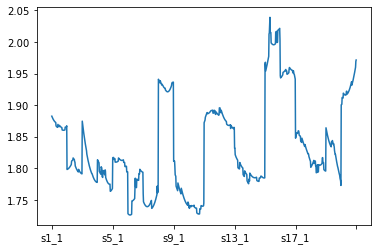

In [6]:
df1 = df.loc[:,'s1_1': f's{nodes}_{r}']
df1 = pd.concat([df1, label], axis=1)
df1.reset_index(drop=True).describe().loc['std'].plot();

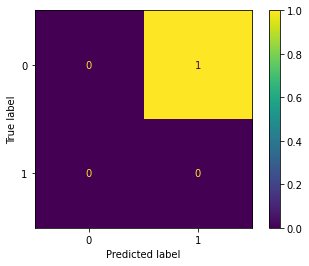

Precision: 0.000
Recall: 0.000
F1: 0.000
Accuracy: 0.000


In [7]:
X_train, X_test, y_train, y_test = generate_data(df1)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

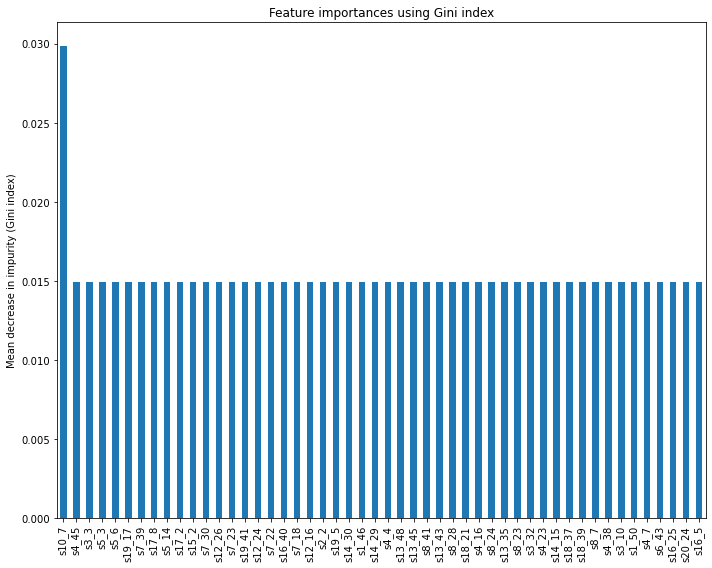

In [8]:
plot_gini_index(clf, X_train)

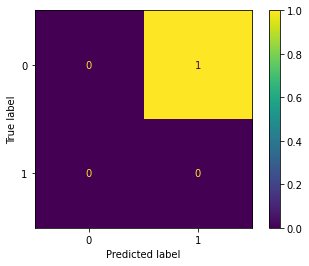

Precision: 0.000
Recall: 0.000
F1: 0.000
Accuracy: 0.000


In [9]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with adjacency matrix

In [10]:
df2 = df.loc[:,0:nodes**2-1]
df2 = pd.concat([df2, label], axis=1)
df2.reset_index(drop=True)


KeyboardInterrupt



In [ ]:
X_train, X_test, y_train, y_test = generate_data(df2)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

In [ ]:
plot_gini_index(clf, X_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with graph2vec

In [ ]:
df3 = df.loc[:,'f1':'f16']
df3 = pd.concat([df3, label], axis=1)
df3.reset_index(drop=True)

In [ ]:
X_train, X_test, y_train, y_test = generate_data(df3)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

In [ ]:
plot_gini_index(clf, X_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

# NMF

In [ ]:
import numpy as np
from NNetwork import NNetwork as nn
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
g2v_true = df3[df3['Concentrated'] == True].drop('Concentrated', axis = 1)
g2v_false = df3[df3['Concentrated'] == False].drop('Concentrated', axis = 1)

In [ ]:
g2v_true = g2v_true.sample(n=1936)
g2v_false = g2v_false.sample(n=1936)

In [ ]:
X_true = g2v_true.values
X_false = g2v_false.values

In [1]:
from kuramoto import Kuramoto
from kuramoto.db_metrics import *

In [6]:
df = gen_KM(
    nodes = 30,
    num_samples = 1000,
    r = 1,
    edge_var = 'H',
    random_K = False,
    half_sync = True,
)

In [7]:
df

,s1_1,s2_1,s3_1,s4_1,s5_1,s6_1,s7_1,s8_1,s9_1,s10_1,...,s28_1,s29_1,s30_1,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Baseline,Synchronized
0,1.739120,0.416562,1.113684,0.391733,2.067145,0.547464,0.689927,2.559879,1.911444,2.761935,...,1.193516,0.436303,2.152658,426,30,25,29,2,1,1
1,3.132034,0.708249,0.882424,2.399688,2.206498,1.827177,2.808531,0.636834,1.564207,0.289122,...,1.647326,0.107283,0.557264,143,30,7,12,3,1,1
2,2.686842,1.496497,2.425426,2.738892,0.221807,1.176002,2.947849,0.259831,3.097286,1.372794,...,2.631424,1.791029,1.908808,196,30,10,17,2,1,1
3,1.328169,1.279983,0.027496,1.644137,3.078029,2.058578,0.291987,1.749568,0.368585,2.129465,...,3.078336,1.299149,0.332818,299,30,14,24,2,1,1
4,1.959153,1.650613,0.750490,1.823241,2.837397,3.027542,2.746448,1.097442,1.247341,2.852462,...,0.247837,0.878591,1.360707,48,30,2,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2.078590,2.808776,2.319396,2.276378,2.915531,0.190853,0.849801,0.271305,0.283110,2.991959,...,0.813178,2.682359,0.739016,299,30,16,25,2,1,1
956,1.299385,0.161498,2.862261,1.681161,0.133411,0.595883,2.875288,2.386430,2.872750,2.614490,...,2.671914,1.922835,1.833393,295,30,17,25,2,1,1
957,1.875184,1.949546,2.246409,2.162956,2.726708,2.296701,0.235019,1.284119,2.695378,2.706836,...,3.134090,0.394024,0.152273,209,30,9,18,2,1,1
958,1.757692,0.617352,1.661376,1.827615,1.487990,2.037087,2.984054,0.785515,2.483590,1.115621,...,0.575175,3.135765,2.056522,245,30,13,19,2,1,1


In [8]:
sum(df['Baseline'])

960

In [9]:
sum(df['Synchronized'])

960

In [14]:
df_true = gen_KM(
    nodes = 30,
    num_samples = 1000,
    r = 125,
    edge_var = 'H',
    random_K = False,
    half_sync = True,
)

In [15]:
df_true

,s1_1,s1_2,s1_3,s1_4,s1_5,s1_6,s1_7,s1_8,s1_9,s1_10,...,s30_123,s30_124,s30_125,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Baseline,Synchronized
0,2.056082,2.053291,2.050498,2.047703,2.044905,2.042106,2.039305,2.036503,2.033699,2.030895,...,2.189850,2.184220,2.178627,399,30,24,29,2,1,1
1,2.173136,2.169321,2.165504,2.161686,2.157867,2.154047,2.150226,2.146406,2.142584,2.138763,...,1.609961,1.608421,1.606895,343,30,18,26,2,1,1
2,0.545017,0.549828,0.554651,0.559484,0.564327,0.569181,0.574045,0.578918,0.583800,0.588691,...,2.101028,2.094995,2.089008,197,30,9,17,3,1,1
3,0.767004,0.773761,0.780525,0.787296,0.794072,0.800853,0.807638,0.814427,0.821218,0.828010,...,1.629632,1.630741,1.631842,242,30,11,20,2,1,1
4,0.345699,0.351758,0.357843,0.363951,0.370084,0.376241,0.382421,0.388624,0.394849,0.401096,...,1.576713,1.577945,1.579163,422,30,24,29,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,1.008280,1.012504,1.016721,1.020930,1.025132,1.029327,1.033513,1.037690,1.041859,1.046019,...,1.587558,1.587447,1.587338,343,30,17,29,2,1,1
943,1.046192,1.049222,1.052248,1.055270,1.058289,1.061303,1.064314,1.067320,1.070321,1.073317,...,2.192181,2.185737,2.179335,293,30,15,23,2,1,1
944,0.141018,0.147595,0.154202,0.160841,0.167510,0.174209,0.180937,0.187695,0.194482,0.201297,...,1.213698,1.217455,1.221185,387,30,19,29,2,1,1
945,2.310829,2.307155,2.303480,2.299804,2.296128,2.292453,2.288777,2.285102,2.281428,2.277754,...,1.542347,1.544007,1.545652,427,30,25,29,2,1,1


In [17]:
sum(df_true['Baseline'])

947

In [19]:
sum(df_true['Synchronized'])

947

In [10]:
model = Kuramoto(coupling = 1, dt = 0.01, T = 18, n_nodes = 50, half_sync = False)

In [14]:
G = nx.newman_watts_strogatz_graph(50, 4, 0.65, seed = 42)

In [15]:
adj_mat = nx.to_numpy_array(G)

In [17]:
sim = model.run(adj_mat)

In [21]:
sim.T.shape

(1800, 50)

In [26]:
sim.T

array([[5.74649047, 4.5681066 , 0.9850979 , ..., 5.17545988, 3.91012667,
        4.66947535],
       [5.74499484, 4.56134132, 0.96557294, ..., 5.16602608, 3.91963381,
        4.6750291 ],
       [5.74347586, 4.55463223, 0.94600052, ..., 5.15658821, 3.92906381,
        4.6805102 ],
       ...,
       [5.03613126, 1.81675578, 0.08814715, ..., 3.48286745, 5.33794985,
        5.12158716],
       [5.03583876, 1.80323094, 0.07630224, ..., 3.4810461 , 5.33673719,
        5.12112466],
       [5.03554305, 1.78967766, 0.06450267, ..., 3.47923368, 5.335544  ,
        5.12071648]])

In [23]:
sim.T[125]

array([5.36237618, 3.95995513, 5.08246363, 5.20683838, 3.82915326,
       3.49843161, 2.78808407, 3.71806265, 2.25472696, 3.63524689,
       0.34825259, 1.06114787, 5.38568112, 5.54972825, 0.97879035,
       6.09579405, 2.63767574, 1.46909649, 1.30267859, 3.23380043,
       3.90685363, 4.23917751, 0.2109391 , 0.49665426, 1.18299081,
       4.70983409, 1.60591495, 4.49659074, 1.06554164, 2.94434014,
       2.98479616, 2.32950165, 3.66256557, 4.01021141, 4.62718173,
       6.04250187, 0.66773308, 1.51796911, 2.99841936, 6.24628139,
       6.07024287, 4.48620042, 5.1418119 , 5.12505533, 4.84837995,
       3.18424956, 3.86227984, 4.20963518, 4.48200513, 4.89475541])

In [25]:
sim.T[-1]

array([5.03554305, 1.78967766, 0.06450267, 0.34143395, 4.58895964,
       4.28183023, 5.24565061, 1.87494609, 1.44724756, 6.05577013,
       2.34513585, 0.24704416, 2.75370518, 3.70385343, 3.67427664,
       4.61007925, 3.67531426, 1.92683519, 4.43307497, 1.78253489,
       6.22553522, 3.58278561, 6.01358354, 0.65527161, 4.94583298,
       4.02209436, 1.77878371, 1.56908417, 4.70257964, 0.10527355,
       4.96314162, 5.84739294, 2.7941477 , 1.75131418, 6.03775285,
       6.07952091, 5.87896371, 0.77129999, 3.62237468, 3.99779662,
       6.21600784, 6.05831412, 5.98599054, 0.73826472, 5.36809028,
       4.70981117, 3.05508816, 3.47923368, 5.335544  , 5.12071648])